In [1]:
%load_ext autoreload
%autoreload 2

# load packages
import numpy as np
import matplotlib.pyplot as plt


# Exercise 3: Interpolation and continuous choice 

Consider the following Python code to create do linear interpolation for the function: $f(x)=(x-3)^2$

In [3]:
# define the function to be interpolated
f = lambda x: (x-3)**2 

# define the points at which the function will be interpolated, "unknown points"
x_interp = np.linspace(0,6,100) 
f_true = f(x_interp) # compute for comparison

# define points at which the function is known
x_known = np.array([0,1,2,3,4,5,6],dtype=float) 
f_known = f(x_known)

# linear interpolation between known function values
f_linear_interp = np.interp(x_interp,x_known,f_known) 

### 1. Plot the true function, the known points and the linearly interpolated function in a single figure.

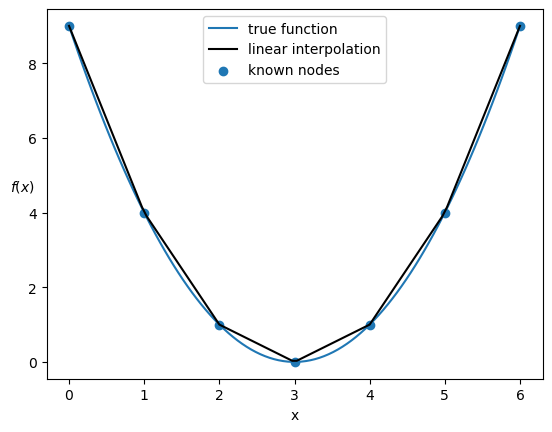

In [8]:
f, ax = plt.subplots()

ax.plot(x_interp,f_true,label='true function')
ax.plot(x_interp,f_linear_interp,'black',label='linear interpolation')
ax.scatter(x_known,f_known,label='known nodes')

ax.set_xlabel("x")
ax.set_ylabel("$f(x)$", rotation=0)
ax.legend()

Consider the consumption-saving model with *continous* consumption choice and *infinite time* horizon (remember: infinite horizon means we supress time subscripts):
$$\begin{align*}
    V(W) & = \max_{0 \le c \le W} \{ \sqrt{c}+\beta V(\underbrace{W-c}_{W_{next}}) \} \\
\end{align*}$$
for $\beta=0.90$ and $W_{1}=10$.

Note that the change compared to exercise 2 is that we don't restrict $c \in \mathbb{N}_0$ but only $0 \le c \le W$ such that $c$ can be non-integers too.

### 2. Solve the infinite horizon model using *value function iteration*, *grid search*, and *linear interpolation* in $\texttt{Exercise\_3.py}$

Hint: For each possible wealth level (w) we choose consumption as a share of that wealth.

In [10]:
# 1. load modules related to this exercise
import Exercise_3 as ex3

# 2. setup par class for parameters
class par: pass
par.beta = 0.90
par.W = 10

# 3. create grids in par
par.num_W = 200 # number of grid points for W
par.num_C = 50 # number of grid points for the choice space of C
par.grid_W = np.linspace(0.0,par.W,par.num_W) # grid for W

# 4. parameters for VFI
par.max_iter = 200   # maximum number of iterations
par.tol = 10e-5 #convergence tol. level

# 5. Solve the model
sol = ex3.solve_consumption_grid_search(par)

### 3. Plot $V(W)$ (the value function) and $C^{\star}(W)$ (the consumption function). *Ensure that both functions are increasing in $W$*. Compare the results to those found in the last exercise. - try changing the number of points in the state grid and consumption guess grid.

In [18]:
# define function for plotting
def plot_solution(par,sol):
    
    f, ax = plt.subplots(1,2, figsize=(10,5))
    grid_W = par.grid_W

    ax[0].scatter(grid_W,sol.V, s=5)
    ax[0].set_xlabel("$W$")
    ax[0].set_ylabel("$V(W)$",)
    ax[0].set_title('Value function')

    ax[1].scatter(grid_W,sol.C, s=5)
    ax[1].set_xlabel("$W$")
    ax[1].set_ylabel("$C^*(W)$")
    ax[1].set_title('Policy function')

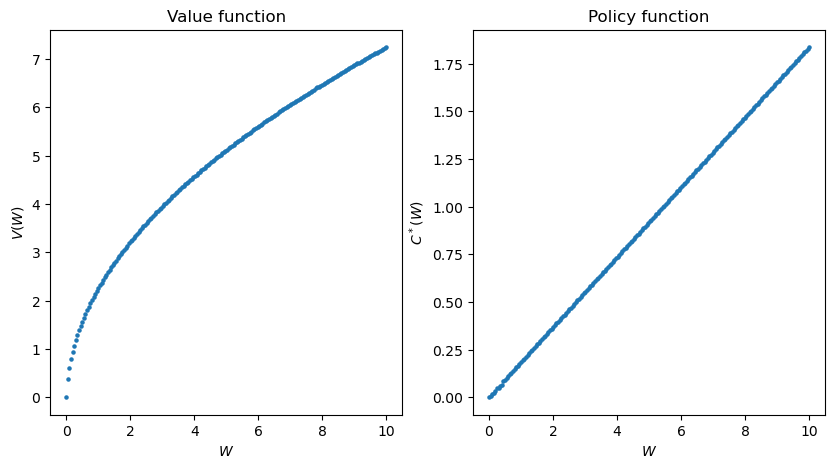

In [19]:
plot_solution(par,sol)

    Compare the results from Exercise 2 and Exercise 3:


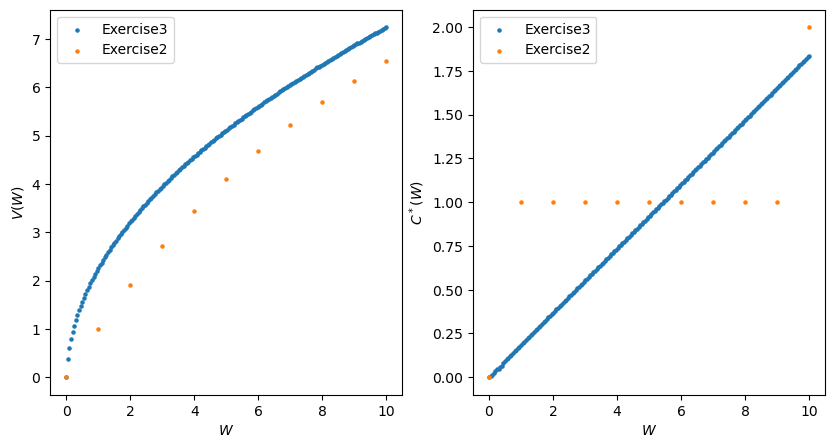

In [ ]:
# compare the solution with the last excercise by re-running exercise 2 (discrete choices)
import Exercise_2 as ex2

class par_ex2: pass
par_ex2.beta = 0.9
par_ex2.W = 10
par_ex2.grid_W = np.arange(par_ex2.W+1)
par_ex2.max_iter = 200   # maximum number of iterations
par_ex2.tol = 10e-5 #convergence tol. level

sol_ex2 = ex2.solve_VFI(par_ex2)

# plot the figures
f, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(par.grid_W,sol.V, s=5)
ax[0].scatter(par_ex2.grid_W,sol_ex2.V, s=5)
ax[0].set_xlabel("$W$")
ax[0].set_ylabel("$V(W)$")
ax[0].legend(('Exercise3','Exercise2'))

ax[1].scatter(par.grid_W,sol.C, s=5)
ax[1].scatter(par_ex2.grid_W,sol_ex2.C, s=5)
ax[1].set_xlabel("$W$")
ax[1].set_ylabel("$C^*(W)$")
ax[1].legend(('Exercise3','Exercise2'))

print('    Compare the results from Exercise 2 and Exercise 3:')

Number of state grid points: 1000
Number of consumption guess grid: 500


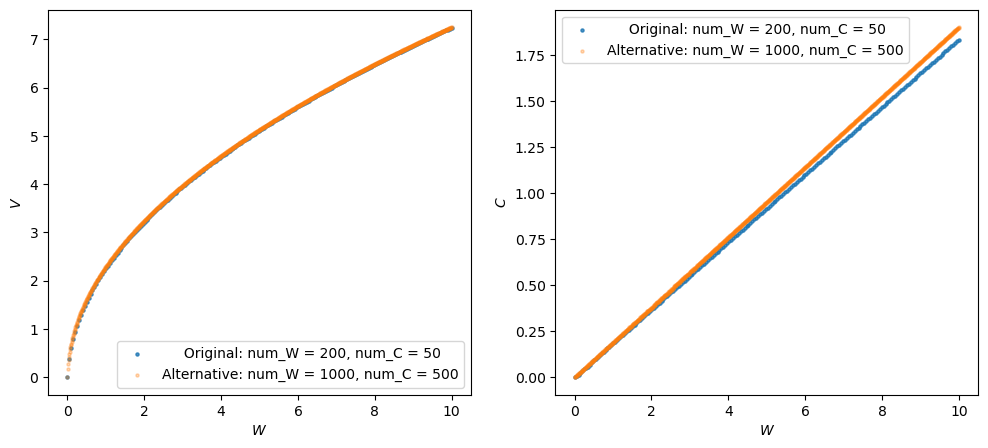

In [41]:
# change the number of points
class par_alt(par): pass # inherit from par
par_alt.num_W = 1000
par_alt.num_C = 500
par_alt.grid_W = np.linspace(0.0,par_alt.W,par_alt.num_W)

sol_alt = ex3.solve_consumption_grid_search(par_alt)

print('Number of state grid points:', par_alt.num_W)
print('Number of consumption guess grid:', par_alt.num_C)

# plot the figures
fig, ax = plt.subplots(1,2,figsize=(12,5)) 
ax[0].scatter(par.grid_W,sol.V, s=5, alpha=0.8, label=f'     Original: num_W = {par.num_W}, num_C = {par.num_C}')
ax[0].scatter(par_alt.grid_W,sol_alt.V, s=5, alpha=0.3, label=f'Alternative: num_W = {par_alt.num_W}, num_C = {par_alt.num_C}')
ax[0].set_xlabel("$W$")
ax[0].set_ylabel("$V$")
ax[0].legend()


ax[1].scatter(par.grid_W,sol.C, s=5, alpha=0.8, label=f'     Original: num_W = {par.num_W}, num_C = {par.num_C}')
ax[1].scatter(par_alt.grid_W,sol_alt.C, s=5, alpha=0.3, label=f'Alternative: num_W = {par_alt.num_W}, num_C = {par_alt.num_C}')
ax[1].set_xlabel("$W$")
ax[1].set_ylabel("$C$")
ax[1].legend();